In [1]:
#Importing important modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import sys
import cv2

Using TensorFlow backend.


In [7]:
print(os.listdir("./sample_data/TRAIN"))

['.ipynb_checkpoints', 'BLACK', 'CHAR']


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#1.Read the images and generate the train and test dataset (5 points)

In [0]:
from keras.preprocessing.image import  img_to_array, load_img
WIDTH = 128
HEIGHT = 128
DEPTH = 3

data = []
labels = []

# loop over the input images
dirs = os.listdir("/content/drive/My Drive/Colab Notebooks/train") 

In [49]:
for dir in dirs:
    absDirPath = os.path.join(os.path.sep,"/content/drive/My Drive/Colab Notebooks/train", dir)
    print(absDirPath)
    images = os.listdir(absDirPath)
    for imageFileName in images:
        
        # load the image, pre-process it, and store it in the data list
        imageFullPath = os.path.join("/content/drive/My Drive/Colab Notebooks/train", dir, imageFileName)
        #print(imageFullPath)
        img = load_img(imageFullPath)
        arr = img_to_array(img) 
        #print(arr.shape)
        arr_final = cv2.resize(arr, (HEIGHT,WIDTH))
        #print(arr_final.shape)
        data.append(arr_final)
        label=str(imageFullPath.split('/')[-2])
        # print(label)
        labels.append(label)

/content/drive/My Drive/Colab Notebooks/train/Fat Hen
/content/drive/My Drive/Colab Notebooks/train/Shepherds Purse
/content/drive/My Drive/Colab Notebooks/train/Cleavers
/content/drive/My Drive/Colab Notebooks/train/Common Chickweed
/content/drive/My Drive/Colab Notebooks/train/Loose Silky-bent
/content/drive/My Drive/Colab Notebooks/train/Small-flowered Cranesbill
/content/drive/My Drive/Colab Notebooks/train/Sugar beet
/content/drive/My Drive/Colab Notebooks/train/Maize
/content/drive/My Drive/Colab Notebooks/train/Common wheat
/content/drive/My Drive/Colab Notebooks/train/Scentless Mayweed
/content/drive/My Drive/Colab Notebooks/train/Black-grass
/content/drive/My Drive/Colab Notebooks/train/Charlock


In [50]:
print(len(images))
print('Number of images :-',len(data))
print('Numbe of Labels',len(labels))

390
Number of images :- 4750
Numbe of Labels 4750


In [51]:
data[0]

array([[[198.92188 , 200.19179 , 200.71132 ],
        [197.77573 , 197.92693 , 198.61948 ],
        [195.35602 , 195.83649 , 197.12364 ],
        ...,
        [ 71.863464,  56.267807,  39.375366],
        [ 70.44141 ,  56.51953 ,  39.078125],
        [ 73.31555 ,  56.585464,  39.317078]],

       [[197.49771 , 197.7661  , 200.7661  ],
        [198.46567 , 198.02426 , 198.46567 ],
        [195.00363 , 197.82603 , 198.15988 ],
        ...,
        [ 59.052322,  43.454666,  33.190857],
        [ 99.35181 ,  87.30008 ,  72.41727 ],
        [ 92.35365 ,  77.58298 ,  59.409958]],

       [[195.65044 , 198.16997 , 197.85947 ],
        [200.30287 , 200.96902 , 202.96902 ],
        [193.16888 , 196.76654 , 198.16888 ],
        ...,
        [ 64.29733 ,  47.699677,  35.05687 ],
        [102.09584 ,  87.83203 ,  72.11719 ],
        [ 97.54079 ,  87.7341  ,  71.25363 ]],

       ...,

       [[165.377   , 169.58603 , 171.89653 ],
        [163.99637 , 167.21303 , 167.39062 ],
        [162.0663  , 1

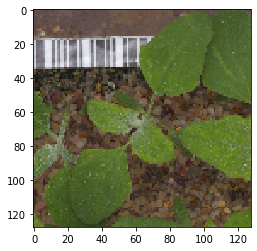

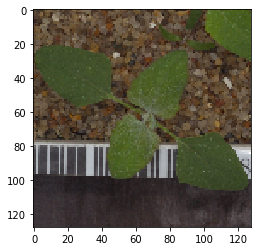

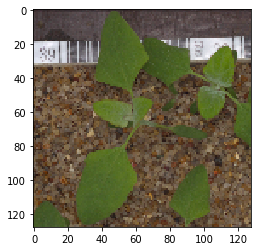

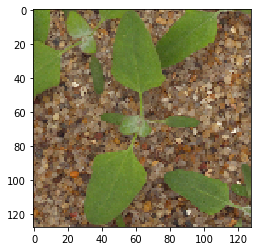

In [52]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
import keras
#to view the images

for i in range(1,5):
    #print(i)
    new_image = keras.preprocessing.image.array_to_img(data[i])
    #Show image
    #fig, axs = plt.subplots(1, j, figsize=(20, 20))
    plt.imshow(new_image)
    plt.show()

In [0]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# scale the raw pixel intensities to the range [0, 1]
TrainX = np.asarray(data) / 255.0
Y_labels = np.array(labels)
# convert the labels from integers to vectors
#Y =  to_categorical(Y, num_classes=12)
labelEncoder = LabelEncoder()
labelEncoder.fit(Y_labels)
train_labels_encoded = labelEncoder.transform(Y_labels)
trainY = keras.utils.to_categorical(train_labels_encoded, num_classes=12)

In [55]:
print(TrainX.shape)
print(trainY.shape)

(4750, 128, 128, 3)
(4750, 12)


In [0]:
#2. Divide the data set into Train and validation data sets

In [56]:
from sklearn.model_selection import train_test_split
print("Train Validation Split into 80:20...")
(x_train, valX, y_train, valY) = train_test_split(TrainX,trainY,test_size=0.20, random_state=10)

Train Validation Split into 80:20...


In [0]:
#3. Initialize & build the model (10 points)

In [59]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.optimizers import Adam
# initialize the model

inputShape = (WIDTH, HEIGHT, DEPTH)
EPOCHS = 40
INIT_LR = 1e-3
BS = 32

model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape)) 
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), padding="same"))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=500))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(units=12))
model.add(Activation("softmax"))
   
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
activation_21 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
activation_22 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 128)      

In [60]:
#Training on the dataset
model.fit(x_train, y_train,
          batch_size=64,
          epochs=5,
          verbose=1,
          validation_data=(valX, valY))

Train on 3800 samples, validate on 950 samples
Epoch 1/5
3800/3800 [==============================] - 231s 61ms/step - loss: 2.3353 - acc: 0.1950 - val_loss: 1.8526 - val_acc: 0.3516
Epoch 2/5
3800/3800 [==============================] - 228s 60ms/step - loss: 1.4689 - acc: 0.4889 - val_loss: 1.2375 - val_acc: 0.5526
Epoch 3/5
3800/3800 [==============================] - 229s 60ms/step - loss: 1.1506 - acc: 0.6095 - val_loss: 0.9989 - val_acc: 0.6495
Epoch 4/5
3800/3800 [==============================] - 228s 60ms/step - loss: 0.9389 - acc: 0.6776 - val_loss: 0.8636 - val_acc: 0.6947
Epoch 5/5
3800/3800 [==============================] - 228s 60ms/step - loss: 0.7309 - acc: 0.7489 - val_loss: 0.8965 - val_acc: 0.7084


In [61]:
score = model.evaluate(valX, valY)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

950/950 [==============================] - 14s 15ms/step
Test loss: 0.8965310151953446
Test accuracy: 0.7084210527570625


In [0]:
#Optimise the model(8 points)

In [0]:
#Since the number of examples are very less , we have to increase the data points to avoid overfitting.
#For this we can use pretrained convbases like inception, resnet ,vgg etc trained on imagenet
#also , we can increase the number of data points using image data generator.
#Instead of transfer learning , we will increase the number of data points and see whether it worked or nor.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, 
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
   horizontal_flip=True, fill_mode="nearest")


In [68]:
H = model.fit_generator(aug.flow(x_train, y_train, batch_size=BS), 
                        validation_data=(valX, valY), 
                        steps_per_epoch=len(x_train) // BS, 
                        epochs=5, verbose=1)

Epoch 1/5
118/118 [==============================] - 257s 2s/step - loss: 0.8288 - acc: 0.7150 - val_loss: 0.7309 - val_acc: 0.7421
Epoch 2/5
118/118 [==============================] - 256s 2s/step - loss: 0.7600 - acc: 0.7357 - val_loss: 0.5202 - val_acc: 0.8147
Epoch 3/5
118/118 [==============================] - 257s 2s/step - loss: 0.7063 - acc: 0.7553 - val_loss: 0.7592 - val_acc: 0.7200
Epoch 4/5
118/118 [==============================] - 257s 2s/step - loss: 0.6917 - acc: 0.7616 - val_loss: 0.4643 - val_acc: 0.8389
Epoch 5/5
118/118 [==============================] - 257s 2s/step - loss: 0.6042 - acc: 0.7899 - val_loss: 0.4801 - val_acc: 0.8305


In [0]:
#5. Predict the accuracy for both train and validation data (7 points)

In [70]:
score = model.evaluate(x_train, y_train)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(valX, valY)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3800/3800 [==============================] - 55s 14ms/step
Train loss: 0.4535168352252559
Train accuracy: 0.8394736842105263
950/950 [==============================] - 14s 14ms/step
Test loss: 0.48014351107572256
Test accuracy: 0.830526316416891
